# Principal Components Analysis - AUTOS2005 Data

In [1]:
# Chargement des données
from scientisttools.datasets import load_autos2005
autos = load_autos2005()
autos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, ALFA 156     to YARIS       
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   puissance     40 non-null     int64  
 1   cylindree     40 non-null     int64  
 2   vitesse       40 non-null     int64  
 3   longueur      40 non-null     int64  
 4   largeur       40 non-null     int64  
 5   hauteur       40 non-null     int64  
 6   poids         40 non-null     int64  
 7   coffre        40 non-null     int64  
 8   reservoir     40 non-null     int64  
 9   consommation  40 non-null     float64
 10  CO2           40 non-null     int64  
 11  prix          40 non-null     int64  
 12  origine       40 non-null     object 
 13  Carburant     40 non-null     object 
 14  type4X4       40 non-null     object 
dtypes: float64(1), int64(11), object(3)
memory usage: 5.0+ KB


In [2]:
from scientisttools.decomposition import PCA
acp = PCA(row_labels=autos.index,
          col_labels=autos.columns[:9],
          quanti_sup_labels=["consommation","CO2","prix"],
          quali_sup_labels=["origine","Carburant","type4X4"],
          parallelize=False)

#Instanciation
acp.fit(autos)

PCA(col_labels=Index(['puissance', 'cylindree', 'vitesse', 'longueur', 'largeur', 'hauteur',
       'poids', 'coffre', 'reservoir'],
      dtype='object'),
    quali_sup_labels=['origine', 'Carburant', 'type4X4'],
    quanti_sup_labels=['consommation', 'CO2', 'prix'],
    row_labels=Index(['ALFA 156    ', 'AUDIA3      ', 'AUDIA8     ', 'AVENSIS     ',
       'BMW X5      ', 'BMW530      ', 'CHRYS300    ', 'CITRONC2    ',
       'CITRONC4    ', 'CITRONC5    ', 'CLIO        ', 'CORSA       ',
       'CORVETTE    ', 'FIESTA      ', 'GOLF        ', 'LAGUNA      ',
       'LANDCRUI    ', 'MAZDARX8    ', 'MEGANECC      ', 'MERC_A      ',
       'MERC_E      ', 'MODUS       ', 'MONDEO      ', 'MURANO      ',
       'MUSA        ', 'OUTLAND     ', 'P1007       ', 'P307CC      ',
       'P407        ', 'P607        ', 'PANDA       ', 'PASSAT      ',
       'PTCRUISER   ', 'SANTA_FE    ', 'TAHOE       ', 'TWINGO      ',
       'VECTRA      ', 'VELSATIS    ', 'X-TRAIL     ', 'YARIS       '],
      dtype='object', name='ROW_LABEL'))

## Valeurs propres


In [3]:
# Valeurs propres
from scientisttools.extractfactor import get_eigenvalue
eig_val = get_eigenvalue(acp)
eig_val

,eigenvalue,difference,proportion,cumulative
Dim.1,5.716987,3.972305,63.522078,63.522078
Dim.2,1.744682,0.940641,19.385351,82.907429
Dim.3,0.804041,0.538914,8.933788,91.841217
Dim.4,0.265127,0.061352,2.945854,94.787070
Dim.5,0.203775,0.088483,2.264170,97.051240
Dim.6,0.115292,0.033786,1.281025,98.332266
Dim.7,0.081507,0.042081,0.905629,99.237894
Dim.8,0.039425,0.010261,0.438059,99.675953
Dim.9,0.029164,NaN,0.324047,100.000000


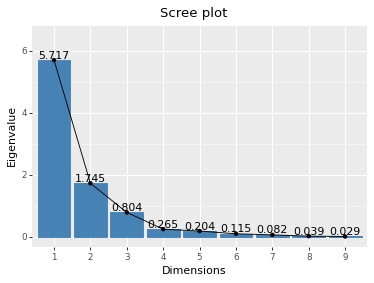

In [4]:
from scientisttools.ggplot import fviz_screeplot
p = fviz_screeplot(acp,
                   choice="eigenvalue",
                   add_labels=True,
                   ylim=(0,6.5))
print(p)

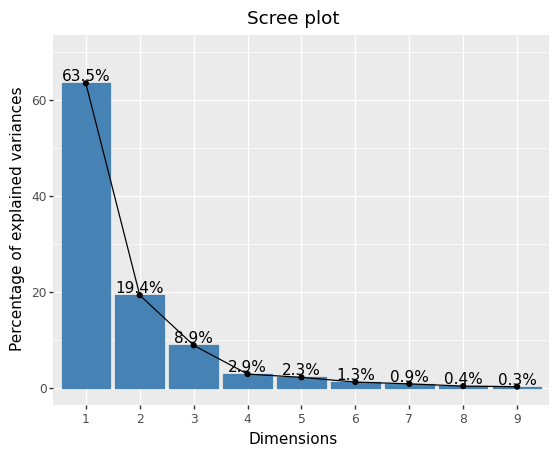

In [5]:
p = fviz_screeplot(acp,
                   choice="proportion",
                   add_labels=True,
                   ylim=(0,70))
print(p)

## Graphique des variables

### Résultats

In [6]:
from scientisttools.extractfactor import get_pca_var
var = get_pca_var(acp)
var.keys()

dict_keys(['corr', 'pcorr', 'coord', 'cos2', 'contrib', 'ftest', 'cor', 'quanti_sup', 'quali_sup'])

In [7]:
# Variables coordinates
var["coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
puissance,-0.843660,-0.414439,0.272983,-0.123605,0.064334,-0.066716,0.020835,0.069331,-0.113354
cylindree,-0.849402,-0.161211,0.379125,-0.232651,-0.163214,0.140943,-0.061400,-0.051686,0.041461
vitesse,-0.592985,-0.763979,-0.089039,-0.031206,0.168182,-0.121512,0.060244,-0.061574,0.073026
longueur,-0.921147,-0.064197,-0.258866,0.177289,0.055784,0.010615,-0.203411,-0.052742,-0.039271
largeur,-0.905536,0.190407,0.014075,0.136239,-0.297487,-0.186527,0.035608,0.010122,0.018160
hauteur,-0.331848,0.882806,0.205183,-0.145572,0.166630,-0.117156,0.002040,-0.075261,-0.008910


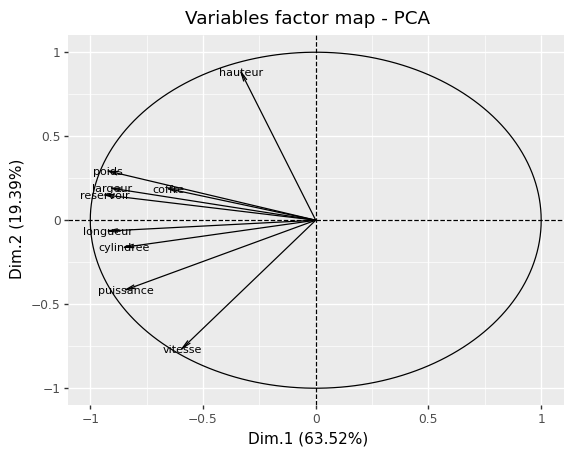

In [8]:
from scientisttools.ggplot import fviz_pca_var
p = fviz_pca_var(acp,
                 color="black",
                 quanti_sup=False)
print(p)

#### Variables contributions

In [9]:
# Variables contributions
var["contrib"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
puissance,12.449954,9.844772,9.268157,5.762568,2.031098,3.860636,0.532607,12.192097,44.058112
cylindree,12.620010,1.489615,17.876664,20.415397,13.072652,17.230135,4.625292,6.775956,5.894279
vitesse,6.150634,33.453867,0.986016,0.367290,13.880605,12.806632,4.452827,9.616504,18.285624
longueur,14.841934,0.236222,8.334351,11.855218,1.527076,0.097729,50.763871,7.055677,5.287922
largeur,14.343125,2.078021,0.024638,7.000867,43.429540,30.177578,1.555656,0.259845,1.130730
hauteur,1.926241,44.669847,5.236082,7.992881,13.625611,11.905027,0.005104,14.366993,0.272216


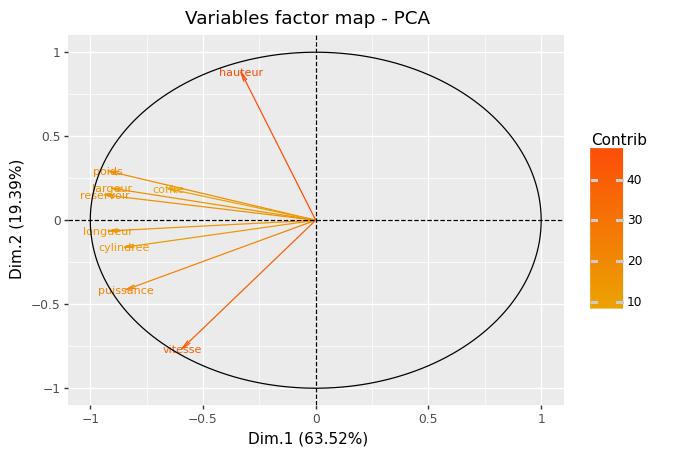

In [10]:
p = fviz_pca_var(acp,
                 color="contrib",
                 quanti_sup=False)
print(p)

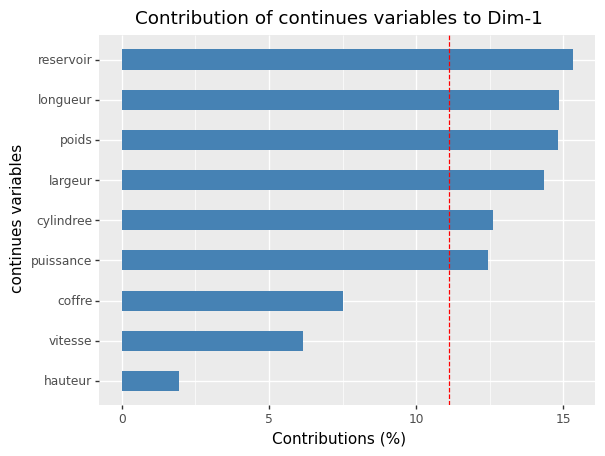

In [11]:
from scientisttools.ggplot import fviz_contrib
p = fviz_contrib(acp,choice="var",axis=0)
print(p)

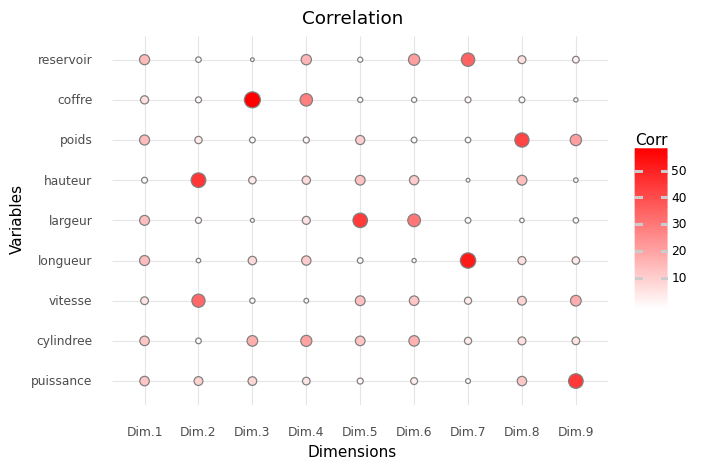

In [12]:
from scientisttools.ggplot import fviz_corrplot
p = fviz_corrplot(var["contrib"],is_corr=False)
print(p)

#### Variables Cos2

In [13]:
# Cosinus of variables
var["cos2"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
puissance,0.711762,0.171760,0.074520,0.015278,0.004139,0.004451,0.000434,0.004807,0.012849
cylindree,0.721484,0.025989,0.143736,0.054127,0.026639,0.019865,0.003770,0.002671,0.001719
vitesse,0.351631,0.583663,0.007928,0.000974,0.028285,0.014765,0.003629,0.003791,0.005333
longueur,0.848511,0.004121,0.067012,0.031431,0.003112,0.000113,0.041376,0.002782,0.001542
largeur,0.819995,0.036255,0.000198,0.018561,0.088499,0.034792,0.001268,0.000102,0.000330
hauteur,0.110123,0.779347,0.042100,0.021191,0.027766,0.013726,0.000004,0.005664,0.000079


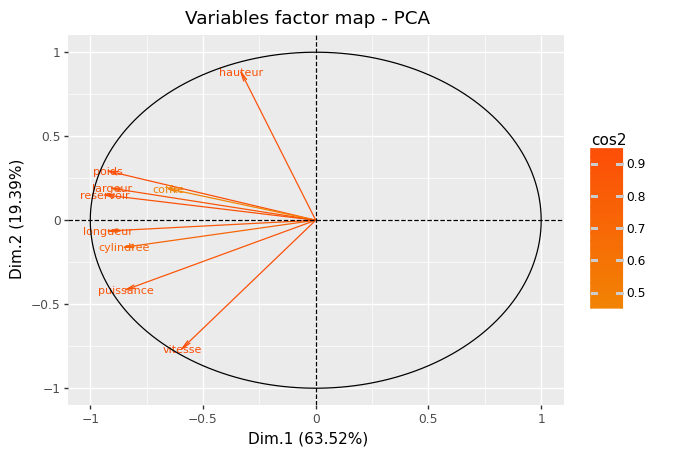

In [14]:
p = fviz_pca_var(acp,
                 color="cos2",
                 quanti_sup=False)
print(p)

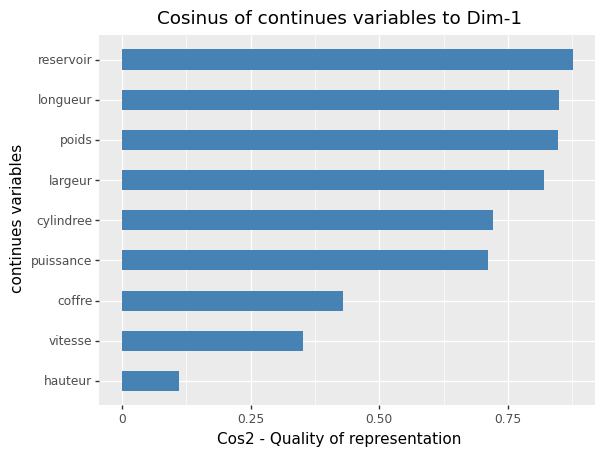

In [15]:
from scientisttools.ggplot import fviz_cosines
p = fviz_cosines(acp,choice="var",axis=0)
print(p)

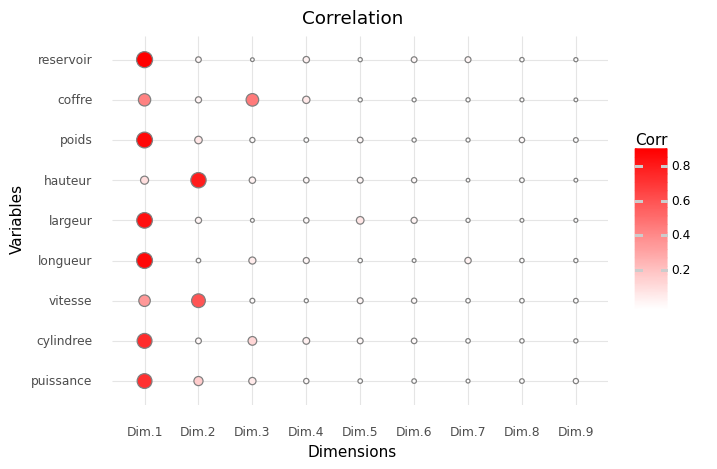

In [16]:
#
p = fviz_corrplot(var["cos2"],is_corr=False)
print(p)

In [17]:
# Using kmeans
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(var["coord"])
kmeans.labels_

array([0, 1, 0, 1, 1, 2, 1, 1, 1])

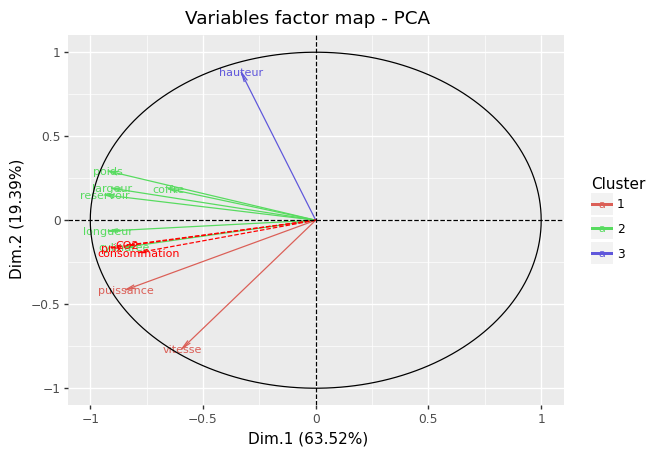

In [18]:
p = fviz_pca_var(acp,
                 color=kmeans,
                 gradient_cols = ["blue", "yellow", "red"],
                 legend_title="Cluster")
print(p)

## Individus

In [19]:
from scientisttools.extractfactor import get_pca_ind
ind = get_pca_ind(acp)
ind.keys()

dict_keys(['coord', 'cos2', 'contrib', 'infos'])

#### Individuals coordinates

In [20]:
# Individuals coordinates
ind["coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
ROW_LABEL,,,,,,,,,
ALFA 156,-0.751230,-1.850417,0.202611,-0.507861,0.316995,0.045210,0.146017,-0.051886,-0.031237
AUDIA3,1.430877,-0.057029,-0.471122,0.316641,-0.510687,0.054888,-0.011568,0.080094,0.024878
AUDIA8,-3.842070,-1.003119,-0.361276,0.606468,-0.711490,-0.215463,0.440408,-0.107023,-0.158119
AVENSIS,0.150502,0.186406,-1.321002,-0.122878,-0.096684,0.331493,-0.386851,-0.022881,0.025262
BMW X5,-2.854643,1.346018,0.250975,0.280243,0.752761,0.298061,0.709077,0.037687,0.046131
BMW530,-1.907471,-1.132022,-0.860018,-0.293228,0.071858,-0.239094,-0.000543,-0.292403,-0.072907


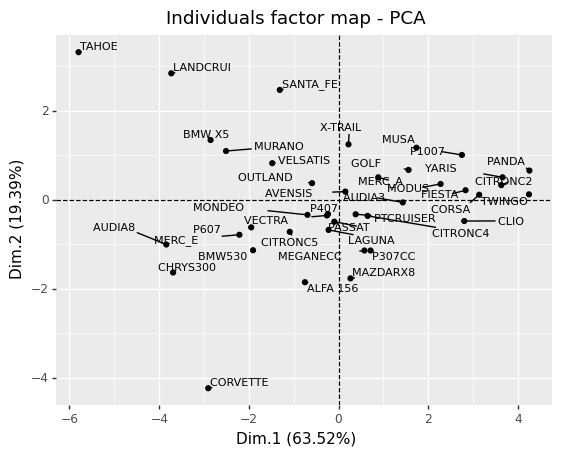

In [21]:
from scientisttools.ggplot import fviz_pca_ind
p = fviz_pca_ind(acp,
                 color="black",
                 repel=True,
                 quali_sup=False,
                 ind_sup=False)
print(p)

In [22]:
# Individuals contributions
ind["contrib"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
ROW_LABEL,,,,,,,,,
ALFA 156,0.246785,4.906403,0.127640,2.432069,1.232805,0.044321,0.653965,0.170710,0.083644
AUDIA3,0.895318,0.004660,0.690126,0.945411,3.199616,0.065328,0.004104,0.406789,0.053053
AUDIA8,6.455107,1.441878,0.405826,3.468184,6.210491,1.006664,5.949174,0.726311,2.143170
AVENSIS,0.009905,0.049790,5.425862,0.142376,0.114684,2.382810,4.590234,0.033200,0.054703
BMW X5,3.563498,2.596126,0.195849,0.740554,6.951895,1.926411,15.421784,0.090063,0.182419
BMW530,1.591067,1.836256,2.299732,0.810772,0.063349,1.239591,0.000009,5.421612,0.455642


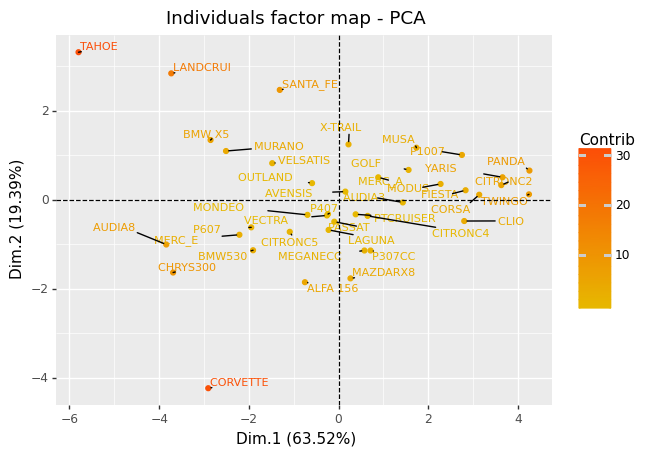

In [23]:
p = fviz_pca_ind(acp,
                 color="contrib",
                 repel=True,
                 quali_sup=False,
                 ind_sup=False)
print(p)

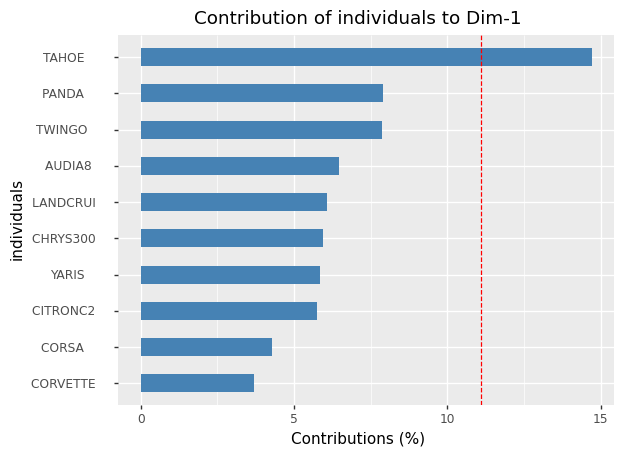

In [24]:
p = fviz_contrib(acp,choice="ind",axis=0,top_contrib=10)
print(p)

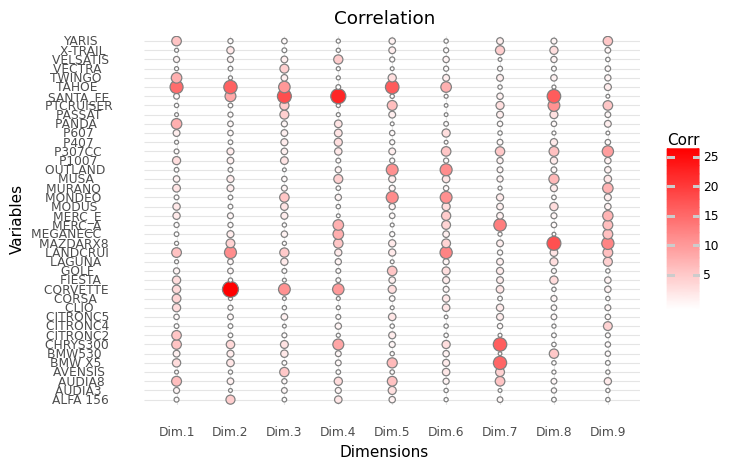

In [25]:
p = fviz_corrplot(ind["contrib"],is_corr=False)
print(p)

#### Individuals Cosines

In [26]:
ind["cos2"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
ROW_LABEL,,,,,,,,,
ALFA 156,0.127828,0.775568,0.009298,0.058421,0.022761,0.000463,4.829342e-03,0.000610,0.000221
AUDIA3,0.774401,0.001230,0.083951,0.037922,0.098644,0.001140,5.061400e-05,0.002426,0.000234
AUDIA8,0.865821,0.059020,0.007656,0.021573,0.029692,0.002723,1.137646e-02,0.000672,0.001466
AVENSIS,0.010850,0.016645,0.835912,0.007233,0.004478,0.052638,7.168717e-02,0.000251,0.000306
BMW X5,0.723447,0.160844,0.005592,0.006972,0.050306,0.007887,4.463655e-02,0.000126,0.000189
BMW530,0.616824,0.217248,0.125389,0.014577,0.000875,0.009691,5.002607e-08,0.014495,0.000901


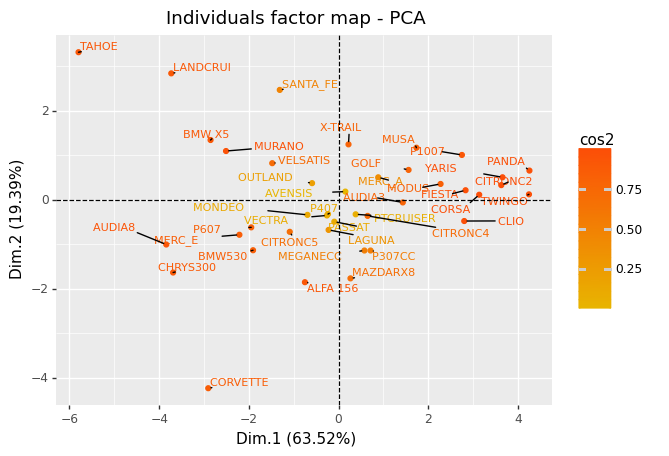

In [27]:
p = fviz_pca_ind(acp,
                 color="cos2",
                 repel=True,
                 quali_sup=False,
                 ind_sup=False)
print(p)

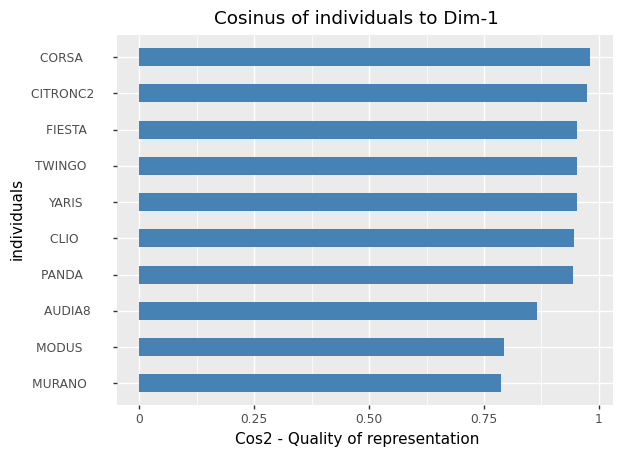

In [28]:
p = fviz_cosines(acp,choice="ind",axis=0,top_cos2=10)
print(p)

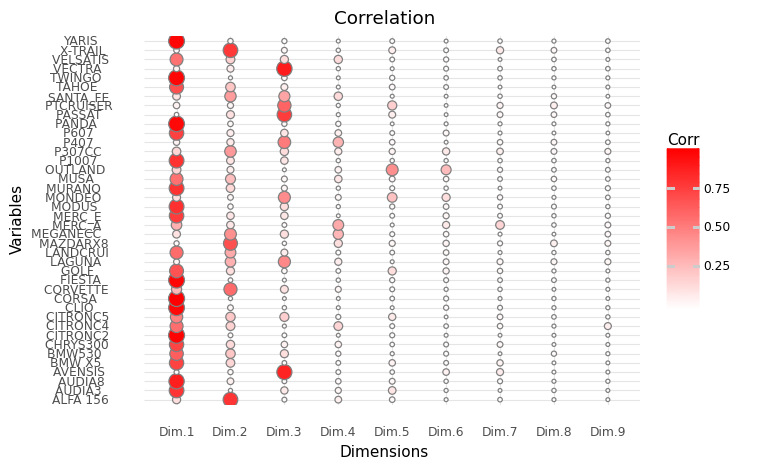

In [29]:
p = fviz_corrplot(ind["cos2"],is_corr=False)
print(p)

In [30]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(ind["coord"])
kmeans.labels_

array([2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1,
       2, 0, 1, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1])

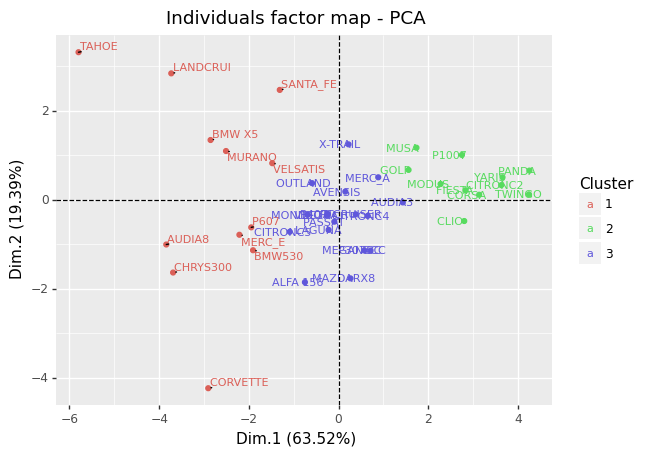

In [31]:
p = fviz_pca_ind(acp,
                 color=kmeans,
                 repel=True,
                 quali_sup=False,
                 ind_sup=False)
print(p)

## Illustratifs

### Variables illustratives quantitatives

In [32]:
# Coordinates
quanti_sup = var["quanti_sup"] 
quanti_sup.keys()

dict_keys(['corr', 'coord', 'cos2', 'ftest'])

In [33]:
quanti_sup["corr"].head(6)

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,coffre,reservoir
consommation,0.890455,0.786310,0.580846,0.664405,0.689463,0.182731,0.694767,0.257378,0.671634
CO2,0.902393,0.809986,0.580303,0.714001,0.725917,0.227783,0.764748,0.319446,0.738849
prix,0.864730,0.851620,0.645706,0.787290,0.765215,0.171228,0.811660,0.463904,0.871006


In [34]:
quanti_sup["coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
consommation,-0.786734,-0.193074,0.331587,-0.023687,0.040856,-0.164578,-0.053309,0.106147,-0.294640
CO2,-0.837728,-0.148696,0.300399,-0.015098,0.074178,-0.108050,-0.034521,0.133626,-0.261251
prix,-0.905634,-0.164459,0.147295,0.024903,0.030389,0.132789,0.129340,0.005644,0.006953


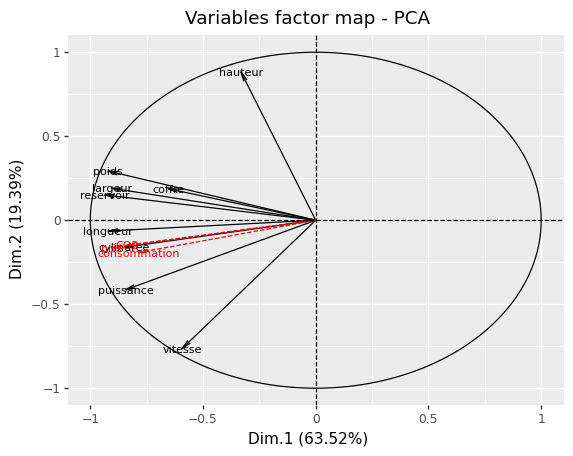

In [35]:
p = fviz_pca_var(acp,
                 color="black",
                 quanti_sup=True)
print(p)

In [36]:
quanti_sup["cos2"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
consommation,0.618951,0.037278,0.109950,0.000561,0.001669,0.027086,0.002842,0.011267,0.086813
CO2,0.701788,0.022110,0.090240,0.000228,0.005502,0.011675,0.001192,0.017856,0.068252
prix,0.820173,0.027047,0.021696,0.000620,0.000923,0.017633,0.016729,0.000032,0.000048


In [37]:
quanti_sup["ftest"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
consommation,-6.464778,-1.189351,2.096182,-0.144110,0.248657,-1.010280,-0.324573,0.648109,-1.846971
CO2,-7.381461,-0.911238,1.885403,-0.091844,0.452035,-0.659821,-0.210065,0.817707,-1.626840
prix,-9.140527,-1.009532,0.902524,0.151511,0.184905,0.812520,0.791178,0.034332,0.042293


### Variables qualitatives supplémentaires

In [38]:
quali_sup =  var["quali_sup"]
quali_sup.keys()

dict_keys(['stats', 'coord', 'cos2', 'dist', 'eta2', 'vtest'])

In [39]:
quali_sup["stats"]

,n(k),p(k)
origine_Autres,12.0,0.300
origine_Europe,15.0,0.375
origine_France,13.0,0.325
Carburant_Diesel,17.0,0.425
Carburant_Essence,23.0,0.575
type4X4_Type4x4_non,34.0,0.850
type4X4_Type4x4_oui,6.0,0.150


In [40]:
quali_sup["coord"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
origine_Autres,-1.322340,0.341631,0.383671,-0.221607,0.058317,-0.004904,-0.098897,0.084659,-0.100740
origine_Europe,0.214277,-0.087342,-0.345807,-0.070982,-0.088359,-0.007968,0.046950,-0.040288,0.044432
origine_France,0.973378,-0.214572,0.044850,0.286463,0.048122,0.013721,0.037116,-0.031661,0.041723
Carburant_Diesel,-0.024889,0.553001,-0.301081,-0.061673,0.113825,0.116152,0.019775,0.011507,0.068572
Carburant_Essence,0.018396,-0.408740,0.222538,0.045585,-0.084131,-0.085852,-0.014617,-0.008505,-0.050683
type4X4_Type4x4_non,0.403582,-0.334117,-0.043416,0.042193,-0.022703,0.017339,0.014554,-0.006434,0.011349
type4X4_Type4x4_oui,-2.286967,1.893331,0.246026,-0.239093,0.128648,-0.098253,-0.082473,0.036462,-0.064312


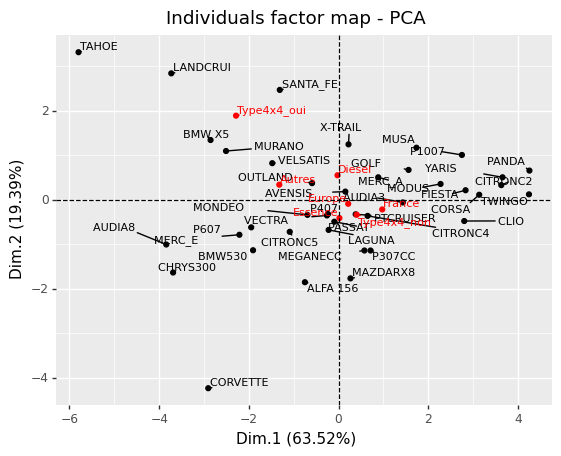

In [41]:
p = fviz_pca_ind(acp,
                 color="black",
                 repel=True,
                 quali_sup=True,
                 ind_sup=False)
print(p)

In [42]:
quali_sup["cos2"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
origine_Autres,0.835791,0.055786,0.070361,0.023474,0.001626,0.000011,0.004675,0.003426,0.004851
origine_Europe,0.239343,0.039767,0.623355,0.026264,0.040698,0.000331,0.011490,0.008461,0.010291
origine_France,0.873881,0.042465,0.001855,0.075688,0.002136,0.000174,0.001271,0.000925,0.001606
Carburant_Diesel,0.001432,0.706984,0.209568,0.008793,0.029952,0.031190,0.000904,0.000306,0.010870
Carburant_Essence,0.001432,0.706984,0.209568,0.008793,0.029952,0.031190,0.000904,0.000306,0.010870
type4X4_Type4x4_non,0.583008,0.399584,0.006747,0.006372,0.001845,0.001076,0.000758,0.000148,0.000461
type4X4_Type4x4_oui,0.583008,0.399584,0.006747,0.006372,0.001845,0.001076,0.000758,0.000148,0.000461


In [43]:
quali_sup["dist"]

,dist
origine_Autres,2.092128
origine_Europe,0.191837
origine_France,1.084203
Carburant_Diesel,0.432556
Carburant_Essence,0.236311
type4X4_Type4x4_non,0.279376
type4X4_Type4x4_oui,8.971087


In [44]:
quali_sup["eta2"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
origine,0.148630,0.030285,0.111509,0.163288,0.023068,0.000800,0.051634,0.078239,0.149178
Carburant,0.000080,0.129556,0.083332,0.010604,0.046994,0.086492,0.003546,0.002482,0.119168
type4X4,0.161445,0.362585,0.013285,0.038050,0.014333,0.014776,0.014727,0.005951,0.025027


In [45]:
quali_sup["vtest"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
origine_Autres,-2.261014,1.057408,1.749298,-1.759549,0.528161,-0.059047,-1.416214,1.743128,-2.411689
origine_Europe,0.433512,-0.319871,-1.865531,-0.666850,-0.946859,-0.113522,0.795511,-0.981503,1.258580
origine_France,1.764087,-0.703941,0.216743,2.410813,0.461943,0.175110,0.563364,-0.690971,1.058697
Carburant_Diesel,-0.055888,2.247814,-1.802758,-0.643078,1.353798,1.836622,0.371895,0.311138,2.155818
Carburant_Essence,0.055888,-2.247814,1.802758,0.643078,-1.353798,-1.836622,-0.371895,-0.311138,-2.155818
type4X4_Type4x4_non,2.509255,-3.760425,-0.719798,1.218170,-0.747644,0.759128,0.757854,-0.481744,0.987953
type4X4_Type4x4_oui,-2.509255,3.760425,0.719798,-1.218170,0.747644,-0.759128,-0.757854,0.481744,-0.987953


## Description des axes

la fonction $\texttt{dimdesc()}$ permet de décrire les dimensions.

In [46]:
from scientisttools.extractfactor import dimdesc
d = dimdesc(acp,axis=None,proba=0.05)
d.keys()

dict_keys(['Dim.1', 'Dim.2', 'Dim.3', 'Dim.4', 'Dim.5', 'Dim.6', 'Dim.7', 'Dim.8', 'Dim.9'])

In [47]:
d = dimdesc(acp,axis=[0,1],proba=0.05)
d.keys()

dict_keys(['Dim.1', 'Dim.2'])

In [48]:
d["Dim.1"]["quanti"]

,correlation,pvalue
hauteur,-0.331848,3.644516e-02
vitesse,-0.592985,5.528103e-05
coffre,-0.654817,4.558087e-06
puissance,-0.843660,8.203408e-12
cylindree,-0.849402,4.247374e-12
largeur,-0.905536,1.000823e-15
poids,-0.921074,3.779942e-17
longueur,-0.921147,3.716728e-17
reservoir,-0.936118,7.766431e-19


In [49]:
d["Dim.1"]["quali"]

,Sum. Intra,Sum. Inter,correlation ratio,F-stats,pvalue
type4X4,191.76029,36.919191,0.161445,7.316057,0.010171
